# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# This version of code will provide some insights into the data analysis conducted.
# The code is heavily inspired from TA Drew's speedruns.
# For more information about the code's function, refer to the README file.

In [1]:
!pip install citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     ---------- --------------------------- 194.6/675.6 kB 3.9 MB/s eta 0:00:01
     ----------------------- -------------- 419.8/675.6 kB 5.3 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 5.2 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=f5474feb825f2790e2a1529e25ad3218334b8561840aa770eafe2ae4dff04d13
  Stored in directory: c:\users\josep\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=020a6b91aa3ae5c623277eba2d073557&q=san francisco


In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | balsas
Processing Record 4 of Set 1 | berezovyy
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | phuthaditjhaba
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | pervari
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | tindouf
Processing Record 15 of Set 1 | iturama
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | zahedan
Processing Record 22 of Set 1 | bethel
Processing Record 23 o

Processing Record 38 of Set 4 | khairpur
Processing Record 39 of Set 4 | thunder bay
Processing Record 40 of Set 4 | puerto armuelles
Processing Record 41 of Set 4 | nadym
Processing Record 42 of Set 4 | gidole
Processing Record 43 of Set 4 | herrin
Processing Record 44 of Set 4 | albany
Processing Record 45 of Set 4 | arvayheer
Processing Record 46 of Set 4 | barreiro do jaiba
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | howrah
Processing Record 49 of Set 4 | kimberley
Processing Record 0 of Set 5 | remire-montjoly
Processing Record 1 of Set 5 | kapa'a
Processing Record 2 of Set 5 | bouar
Processing Record 3 of Set 5 | island harbour
Processing Record 4 of Set 5 | shagonar
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | axim
Processing Record 7 of Set 5 | berdigestyakh
Processing Record 8 of Set 5 | afif
Processing Record 9 of Set 5 | nantucket
Processing Record 10 of Set 5 | kem'
Processing Record 11 of Set 5 | keflavik
Processing Recor

Processing Record 30 of Set 8 | rouyn-noranda
Processing Record 31 of Set 8 | smirnovo
Processing Record 32 of Set 8 | al kharijah
Processing Record 33 of Set 8 | mawu
Processing Record 34 of Set 8 | zouerate
Processing Record 35 of Set 8 | st. paul
Processing Record 36 of Set 8 | san juan de los morros
Processing Record 37 of Set 8 | at taj
Processing Record 38 of Set 8 | alvaraes
Processing Record 39 of Set 8 | sidney
Processing Record 40 of Set 8 | ta`u
Processing Record 41 of Set 8 | adh dhibiyah
City not found. Skipping...
Processing Record 42 of Set 8 | strezhevoy
Processing Record 43 of Set 8 | manta
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | betare oya
Processing Record 46 of Set 8 | tonghae
Processing Record 47 of Set 8 | mandal
Processing Record 48 of Set 8 | bandar lampung
Processing Record 49 of Set 8 | sault ste. marie
Processing Record 0 of Set 9 | puerto baquerizo moreno
Processing Record 1 of Set 9 | nema
Processing Record 2 of Set 9 | mar del 

Processing Record 17 of Set 12 | tanjungbalai
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | hastings
Processing Record 20 of Set 12 | mata-utu
Processing Record 21 of Set 12 | san jose village
City not found. Skipping...
Processing Record 22 of Set 12 | balaklava
Processing Record 23 of Set 12 | canals
Processing Record 24 of Set 12 | severobaykal'sk
Processing Record 25 of Set 12 | domna
Processing Record 26 of Set 12 | chibougamau
Processing Record 27 of Set 12 | colares
Processing Record 28 of Set 12 | hadibu
Processing Record 29 of Set 12 | kill devil hills
Processing Record 30 of Set 12 | rongelap
Processing Record 31 of Set 12 | huarmey
Processing Record 32 of Set 12 | klaksvik
Processing Record 33 of Set 12 | kavaratti
Processing Record 34 of Set 12 | cadiz
Processing Record 35 of Set 12 | gaspe
Processing Record 36 of Set 12 | kukes
Processing Record 37 of Set 12 | nabire
-----------------------------
Data Retrieval Complete      
----------------

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,3.28,86,75,4.92,RU,1694280809
1,utrik,11.2278,169.8474,28.17,77,59,5.55,MH,1694280809
2,balsas,-7.5325,-46.0356,38.78,18,48,2.66,BR,1694280809
3,berezovyy,51.6667,135.7000,7.12,53,23,2.34,RU,1694280810
4,margaret river,-33.9500,115.0667,15.54,64,100,6.83,AU,1694280810


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,3.28,86,75,4.92,RU,1694280809
1,utrik,11.2278,169.8474,28.17,77,59,5.55,MH,1694280809
2,balsas,-7.5325,-46.0356,38.78,18,48,2.66,BR,1694280809
3,berezovyy,51.6667,135.7000,7.12,53,23,2.34,RU,1694280810
4,margaret river,-33.9500,115.0667,15.54,64,100,6.83,AU,1694280810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

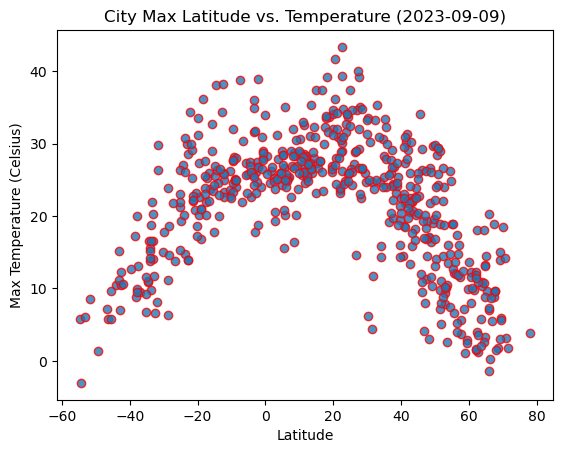

In [23]:
date = time.strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

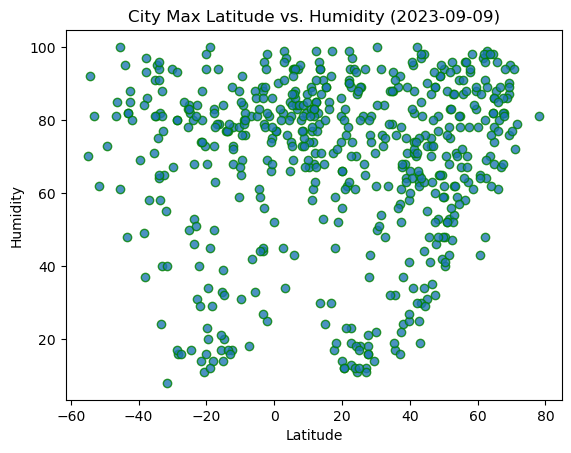

In [24]:
date = time.strftime("%Y-%m-%d")

# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

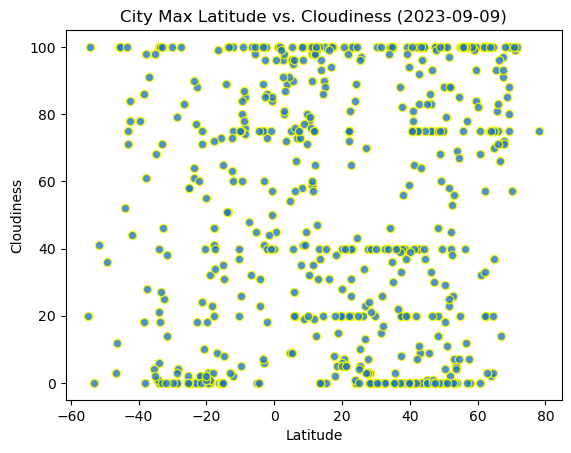

In [25]:
date = time.strftime("%Y-%m-%d")

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

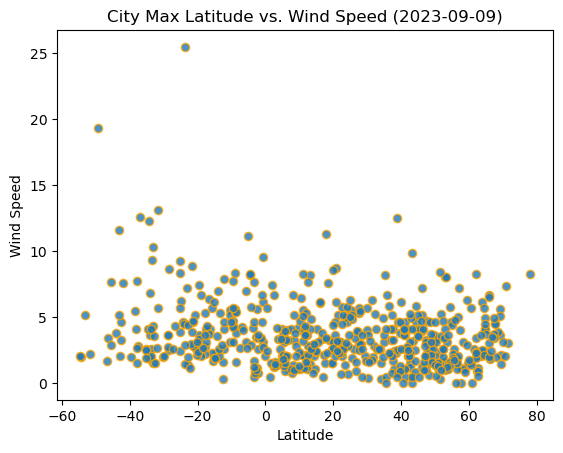

In [26]:
date = time.strftime("%Y-%m-%d")

# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    # Compute linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,3.28,86,75,4.92,RU,1694280809
1,utrik,11.2278,169.8474,28.17,77,59,5.55,MH,1694280809
3,berezovyy,51.6667,135.7000,7.12,53,23,2.34,RU,1694280810
7,saipan,15.1355,145.7010,27.39,89,0,4.12,MP,1694280810
8,pervari,37.9357,42.5493,24.32,37,56,2.41,TR,1694280811


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,balsas,-7.5325,-46.0356,38.78,18,48,2.66,BR,1694280809
4,margaret river,-33.9500,115.0667,15.54,64,100,6.83,AU,1694280810
5,phuthaditjhaba,-28.5242,28.8158,18.64,16,4,2.49,ZA,1694280810
6,adamstown,-25.0660,-130.1015,21.18,84,58,8.34,PN,1694280810
10,grytviken,-54.2811,-36.5092,-3.04,92,100,1.95,GS,1694280811


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.4949962298911312


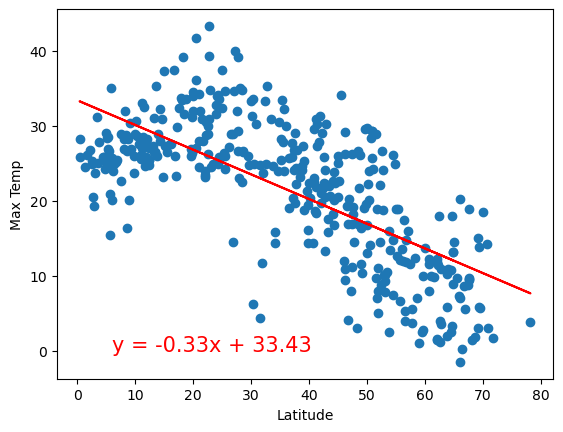

In [39]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (6, 0))

The r-value is 0.6033543046448164


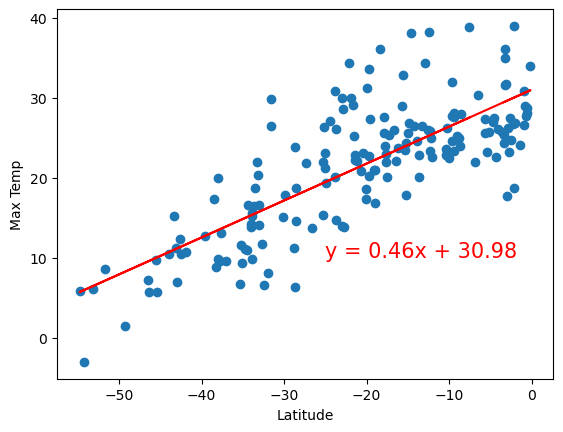

In [44]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (-25, 10))

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is a moderately strong linear association between Latitude and Max Temperature. 
As the Latitude approaches zero, the Max Temperature generally increases.
Both r-values of different hemispheres support this association (being around if not above r-squared = 0.5).

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0020199458619405627


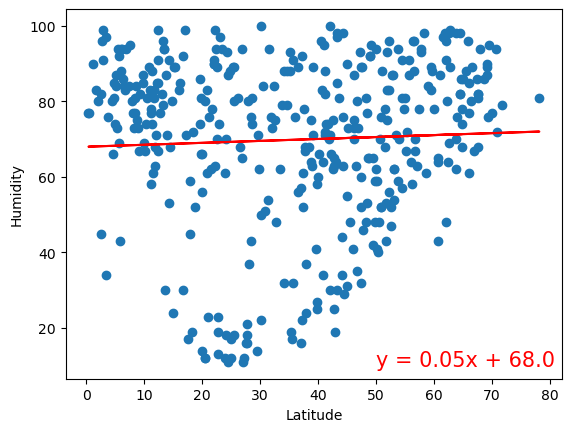

In [47]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (50, 10))

The r-value is 0.008531902055660526


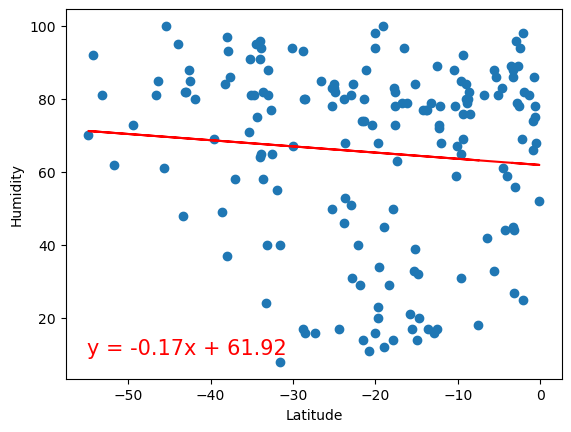

In [48]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (-55, 10))

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is little to no linear
association between Latitude and Humidity. 
No discernable trend could be observed between Latitude and Humidity.
Both r-values of different hemispheres support this association (very close to r-squared values of 0).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.000493778593113722


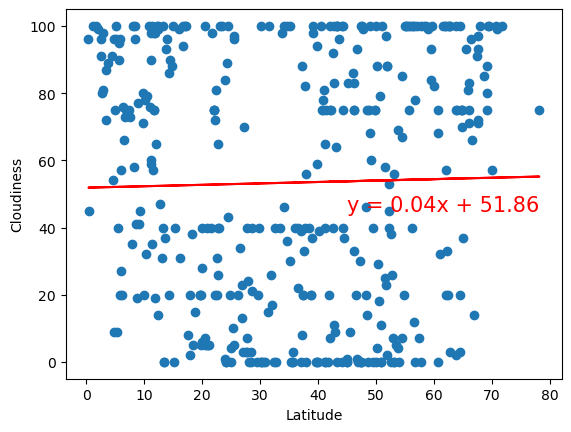

In [51]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (45, 45))

The r-value is 0.015335783802670006


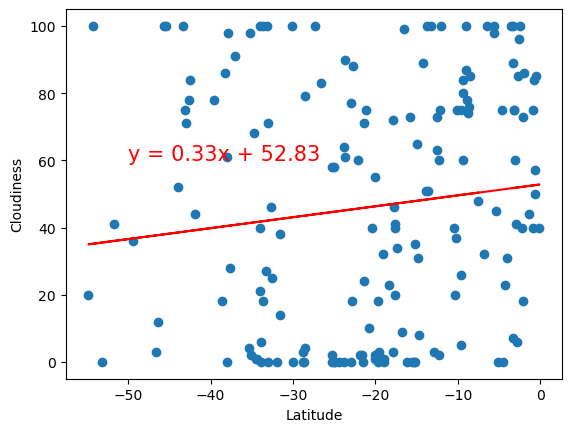

In [54]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (-50, 60))

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is little to no linear
association between Latitude and Cloudiness. 
No discernable trend could be observed between Latitude and Cloudiness.
Both r-values of different hemispheres support this association (very close to r-squared values of 0),
though it is worth noting a linear trend is slightly more noticeable in the Southern hemisphere compared to the North.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.00013838694647754955


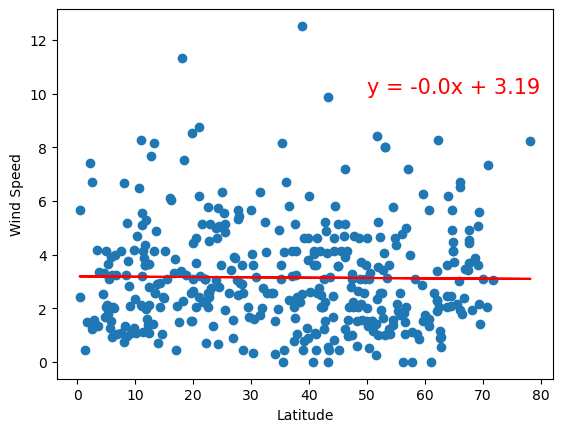

In [55]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (50, 10))

The r-value is 0.009383910399314879


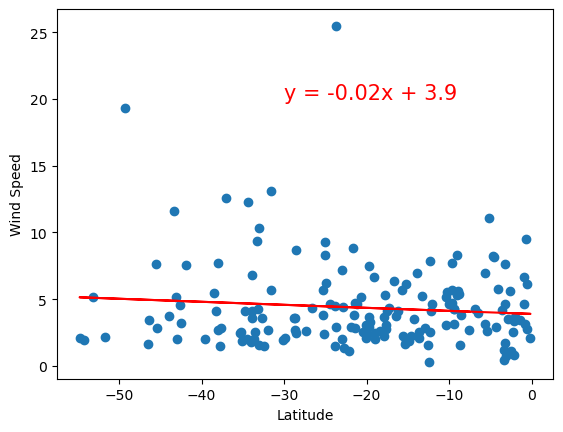

In [56]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (-30, 20))

**Discussion about the linear relationship:** For both the northern and southern hemisphere, there is little to no linear
association between Latitude and Wind Speed. 
No discernable trend could be observed between Latitude and Wind Speed.
Both r-values of different hemispheres support this association (very close to r-squared values of 0).